**PUNKT 1**
```
Ranking    Wyraz(str).     F[procent] - czestotliwosc.      r x f(słupkami poziomymi)
```
Manuskrypt wojnicza oraz dla dowolnego języka naturalnego



Wybranie odpowiedniego tekstu do przetwarzania. str: [1- 118]


In [18]:
linia = 0
file_object = open('wynik.txt', 'w')
with open("FSG.txt", "r") as file:
  for line in file:
      if("page" in line):
        file_object.write(line)
      if("#" not in line and "$" not in line):
        file_object.write(line)
      linia+=1
      if(linia == 2679): break
file_object.close() 

Stworzenie listy zawierającej same słowa
i wyświetlenie ilości słów

In [19]:
t = []
with open("wynik.txt", "r") as wynik:
  for line in wynik:
    if("#" not in line):
      x = line.split(',')
      x[-1] = x[-1].strip()  # usuwa nowe linie
      if( '-' in x[-1]  or '=' in x[-1]):
        x[-1] = x[-1][:-1]
      for i in x:
          t.append(i)
len(t)


10880

Policzenie ilości danego słowa w tekscie

In [20]:
unique_words = set(t)
a = []
for i in unique_words:
  if(i != ''):
    lin = i+ "," +  f'{int(t.count(i))}' # int("7")))
    a.append(lin.split(','))

lst = [[x[0], int(x[1])] for x in a]
lst[0]

['TOE', 227]

In [21]:
lst.sort(key=lambda x: x[1])
lst.reverse()
lst[0]

['8AM', 482]

rank|word|Percent(%)| chart


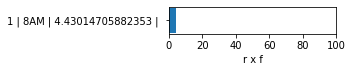

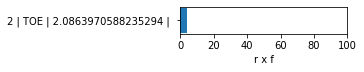

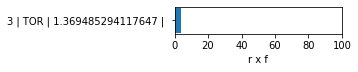

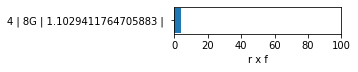

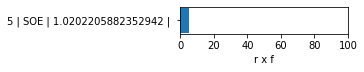

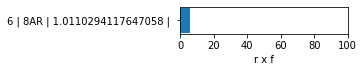

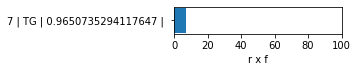

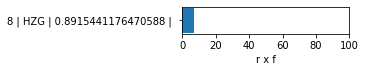

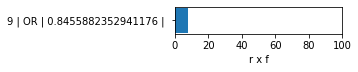

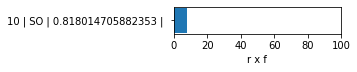

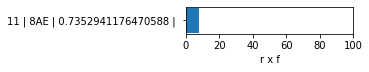

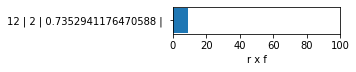

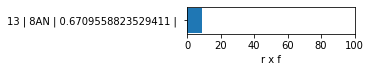

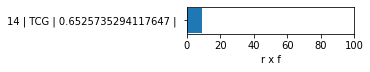

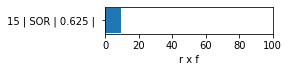

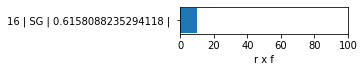

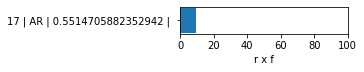

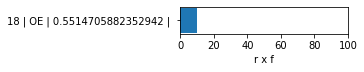

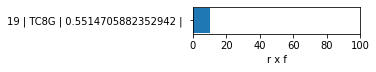

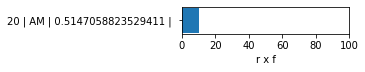

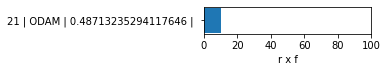

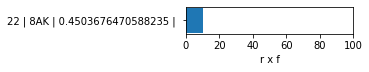

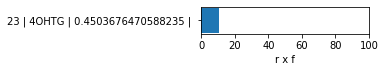

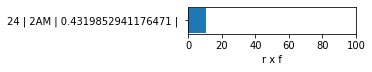

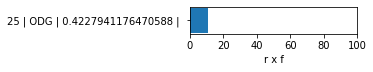

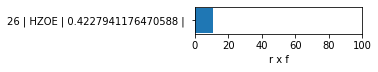

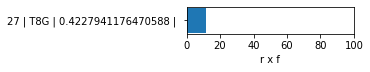

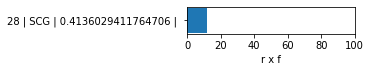

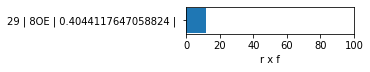

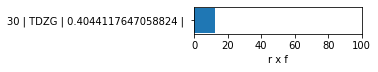

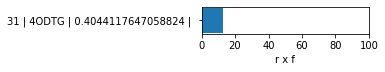

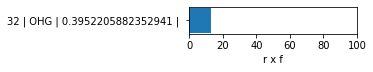

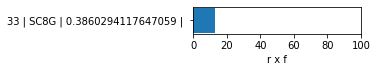

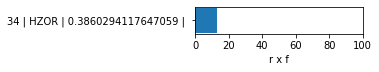

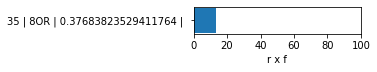

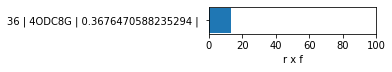

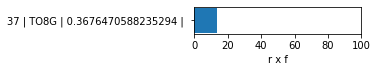

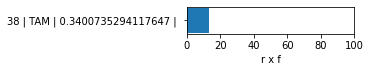

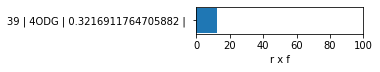

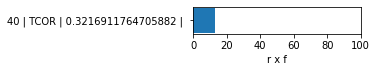

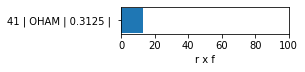

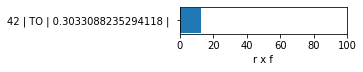

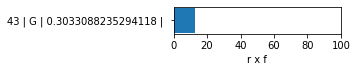

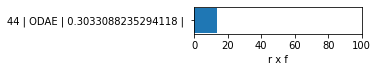

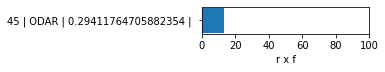

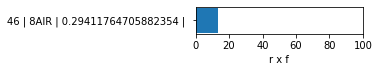

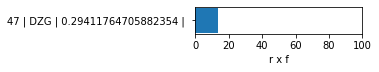

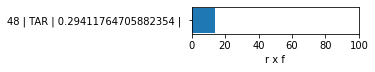

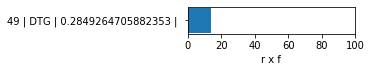

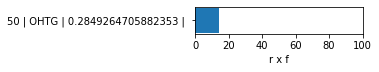

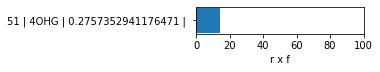

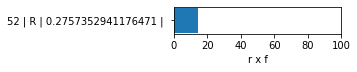

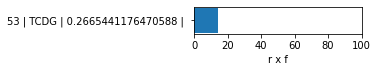

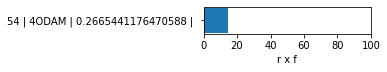

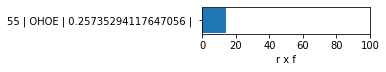

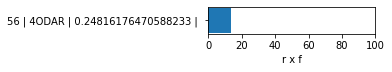

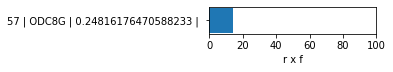

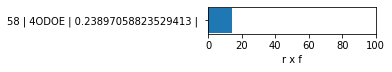

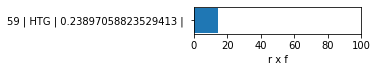

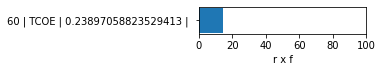

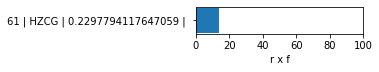

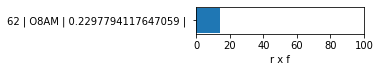

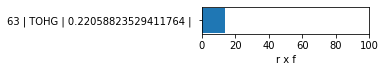

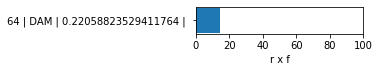

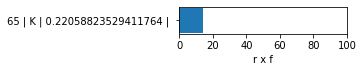

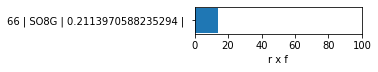

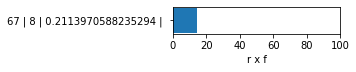

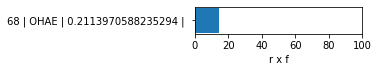

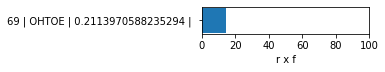

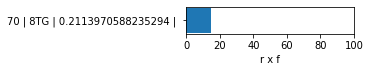

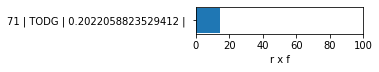

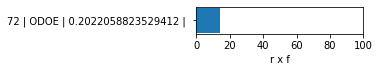

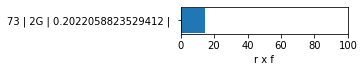

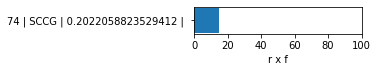

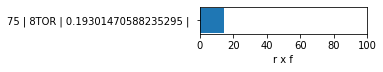

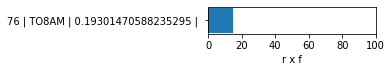

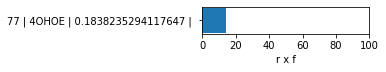

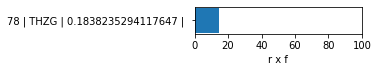

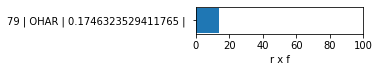

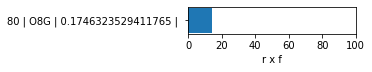

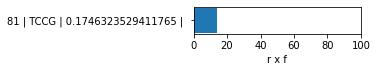

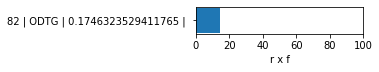

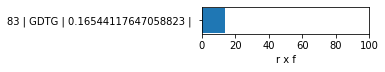

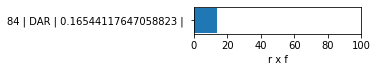

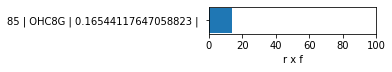

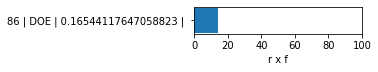

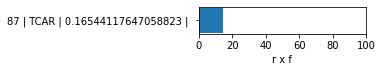

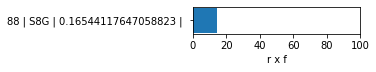

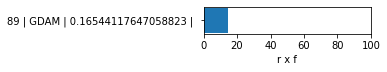

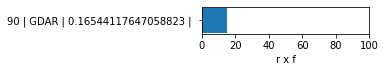

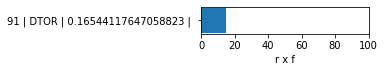

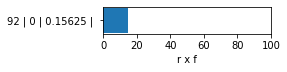

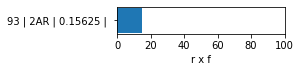

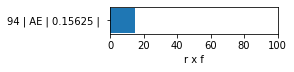

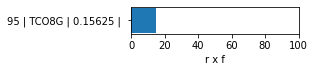

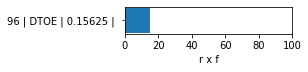

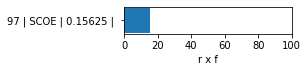

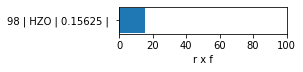

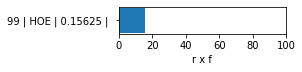

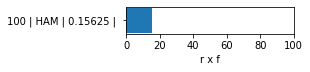

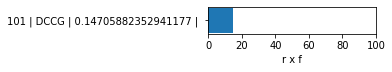

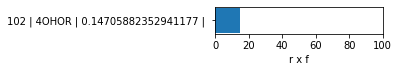

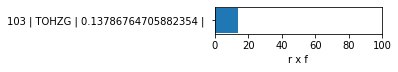

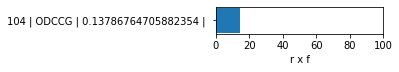

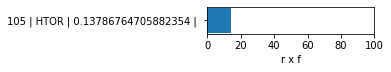

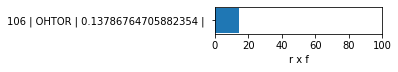

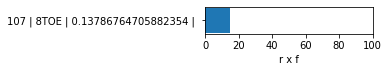

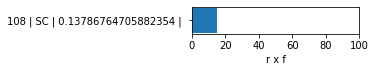

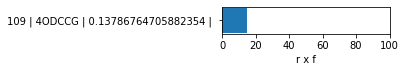

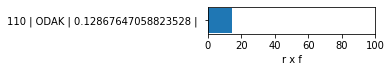

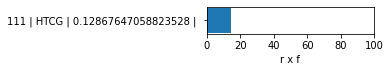

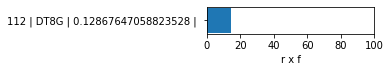

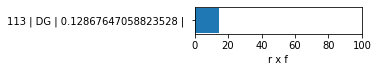

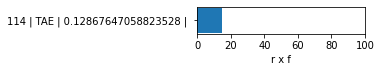

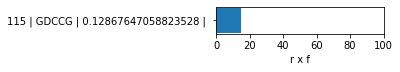

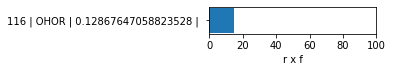

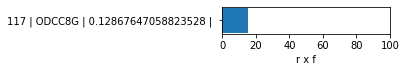

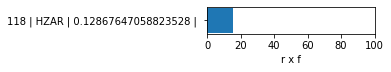

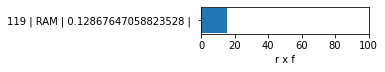

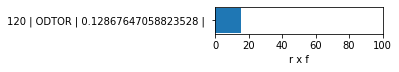

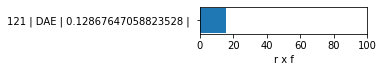

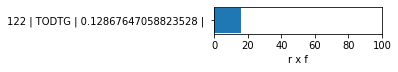

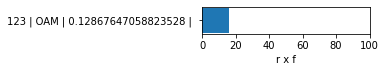

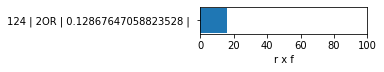

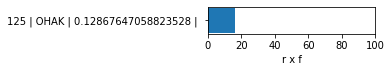

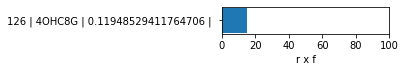

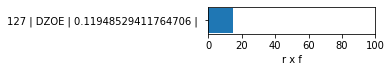

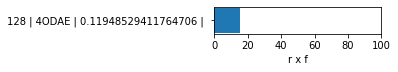

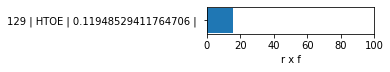

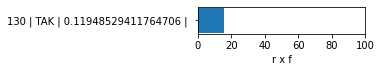

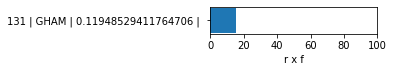

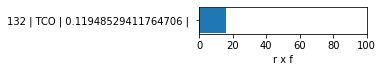

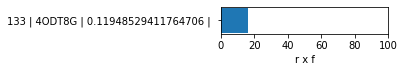

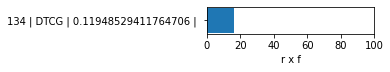

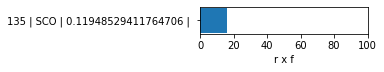

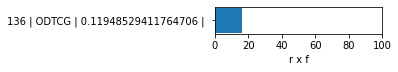

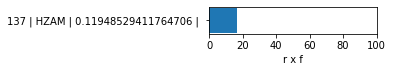

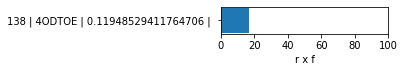

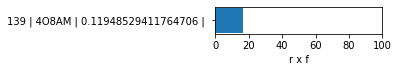

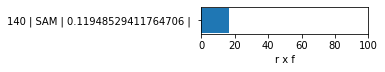

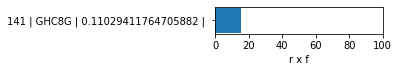

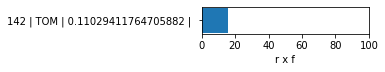

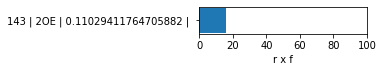

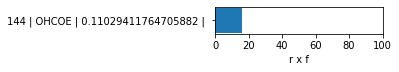

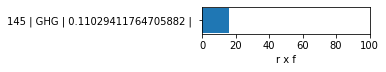

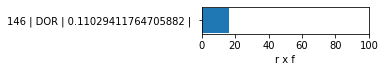

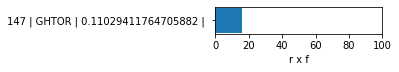

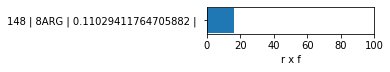

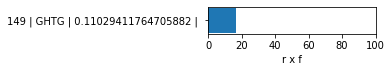

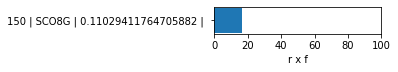

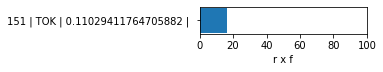

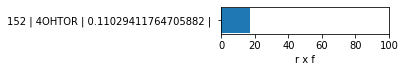

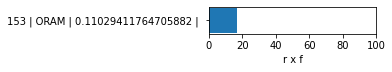

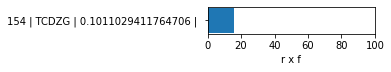

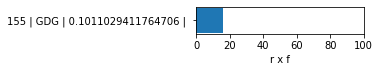

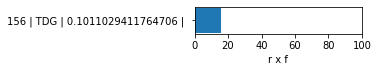

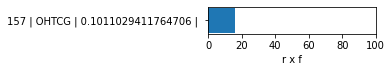

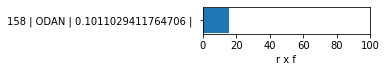

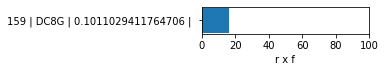

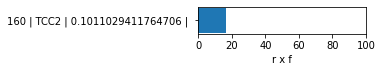

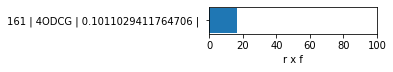

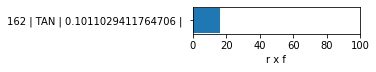

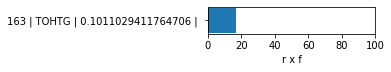

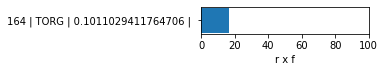

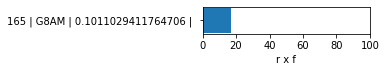

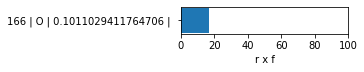

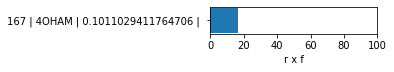

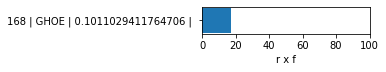

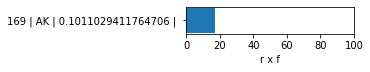

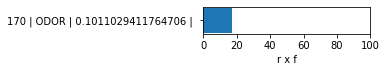

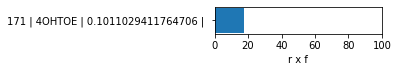

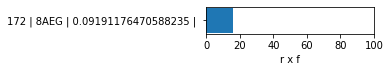

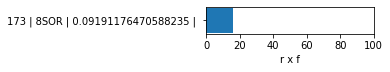

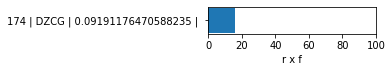

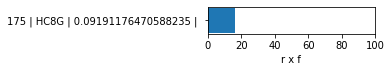

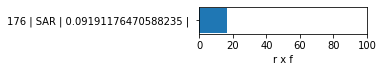

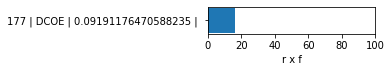

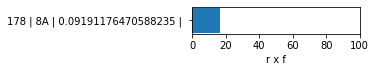

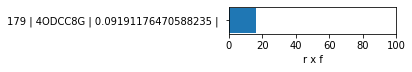

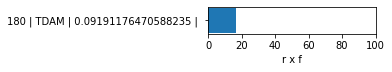

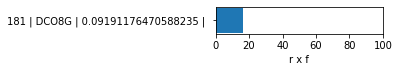

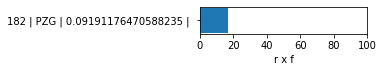

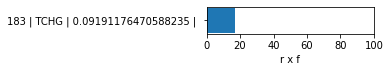

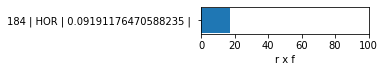

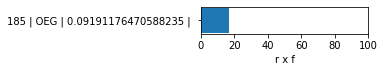

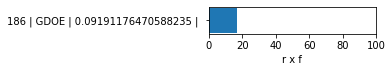

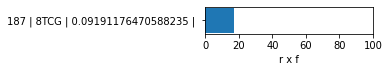

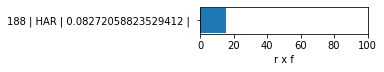

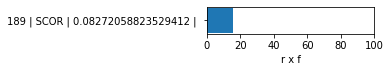

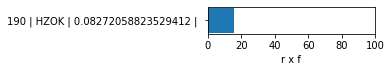

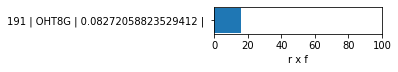

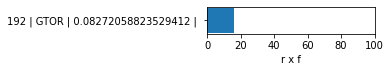

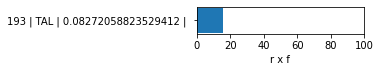

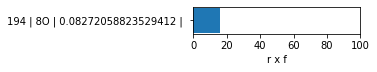

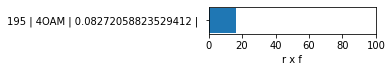

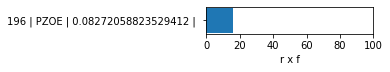

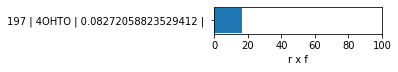

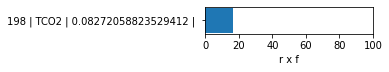

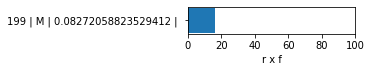

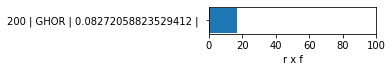

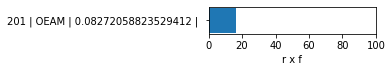

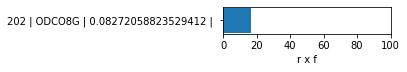

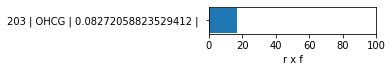

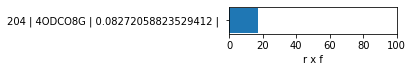

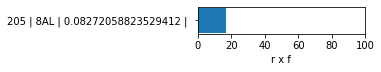

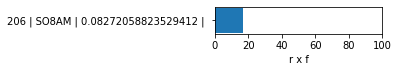

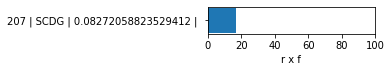

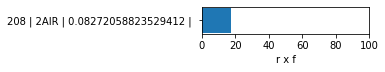

KeyboardInterrupt: ignored

<Figure size 216x36 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
out = lst
indexed_list = list(enumerate(out, 1))

print("rank|word|Percent(%)| chart")
for i in indexed_list:

  nr_rankingowy= i[0]
  wyraz = i[1][0]
  udział_procentowy = i[1][1]/len(t) * 100
  liczba_na_wykres = nr_rankingowy * udział_procentowy   # rank * percent

  napis = f'{nr_rankingowy}' + ' | ' +  f'{wyraz}' +  ' | ' + f'{udział_procentowy}' + ' | '
  y=[napis]
  x=[liczba_na_wykres]

  #print(f'{i[0]}: ' + f'{i[1][0]}' + "  " + f'{i[1][1]}', end=" ") 
  plt.figure(figsize=(3, 0.5))
  plt.barh(y, x)
  
  plt.xlim([0,100])

  plt.xlabel("r x f")
  plt.show()


**PUNKT 2**

Sąsiedztwo między wyrazami
Sąsiedztwo to dwa wyrazy do tylu i dwa wyrazy do przodu.
```
W porządku alfabetycznym
Wyr1.           Wyr1
Wyr2.           Wyr2
Wyr3.           Wyr3
Wyr4            Wyr4
Wyr5            Wyr5
```
I robimy strzaleczkami połączenia między wyrazami sąsiadującymi.

Powinien się znaleźć wyraz który ma znacznie dużo sąsiadów - to jest rdzeń języka.



**Punkt 3** : Analiza bigramów

Badać bigramy w ramach akapitów.
```
Wyr1 wyr2 wyr3 wyr4 wyr5 wyr6 ….

Pary sąsiadujących ze sobą wyrazów -2 sąsiednie.

Wyr1   wyr2      [ilosc wystąpień]
Wyr2   wyr3      [ilosc wystąpień]
Wyr3   wyr4      [ilosc wystąpień]
Wyr4   wyr5      [ilosc wystąpień]
```
W manuskrypie większość bigramów będą pojawiające się 1 raz.


